In [1]:
from sys import platform
import sys, os
# identification de la base de prix utilisée : directory principal
# sur ubuntu

path=''
if platform == 'win32' :
    path ='C:\\Users\\emerg\\Desktop\\Generateprice_YetiPhoenix_VolLoc\\Yetiphoenix\\'
# sur. mac osx
if platform == 'darwin' :
    path ='/Users/olivier/keras/NeuralPricing/AutoCallYetiPhoenix/'
os.chdir(path)
# le package identifie la methode de calibration : sous-directory

In [2]:
import pip,os,pkg_resources; print("pip ",pip.__version__)
# méthode portable
home = os.path.expanduser("~")
print("Home dir:", home)

print(sys.executable)

from importlib.metadata import packages_distributions

dists =packages_distributions()
import numpy as np
from scipy.interpolate import interp1d
import keras
print("keras ",keras.__version__)
import tensorflow as tf
print("tensorflow ",tf.__version__)

C:\Users\emerg\AppData\Local\Temp\ipykernel_26080\2554218853.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pip,os,pkg_resources; print("pip ",pip.__version__)


pip  25.2
Home dir: C:\Users\emerg
C:\Users\emerg\AppData\Local\Programs\Python\Python312\python.exe
keras  3.6.0
tensorflow  2.18.0


In [3]:
from math import sqrt, exp, log, erf,floor
import numpy 
import pandas
from decimal import *
import matplotlib
import matplotlib.pyplot as pyplot
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import mpl_toolkits
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn import preprocessing
from sklearn import model_selection

import joblib
import seaborn as sns
import scipy
from IPython.display import display
import time
import tensorflow as tf
%matplotlib inline
getcontext().prec = 8

from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,FloatProgress
import ipywidgets as widgets
import time

getcontext().prec = 8

In [4]:
from importlib import reload
import train_pytorch_customizable_notebook as t
reload(t)
from train_pytorch_customizable_notebook import TrainConfig, run_training_with_loaders,metaparameters

In [5]:
params=metaparameters()
params.INPUT_DIM  = 23
params.INPUT_GOAL = 24

In [6]:
import pandas as pd
import numpy as np

def load_multiple_data(datafiles, params):
    """
    Charge plusieurs fichiers (CSV ou Excel) et les concatène.
    Retourne X_rough et Y_rough.
    """
    dfs = []
    for f in datafiles:
        if f.lower().endswith(".csv"):
            df = pd.read_csv(f, sep=",", decimal=".", header=None)
        elif f.lower().endswith((".xls", ".xlsx")):
            df = pd.read_excel(f, header=None)
        else:
            raise ValueError(f"Format non supporté pour {f}")
        dfs.append(df)

    # concatène toutes les données verticalement
    dataframe = pd.concat(dfs, ignore_index=True)

    dataset = dataframe.values
    X_rough = dataset[1:, 1:params.INPUT_DIM+1]
    Y_rough = dataset[1:, params.INPUT_GOAL]

    return X_rough, Y_rough


In [7]:
datafiles = ["Data/Learningbase1.CSV", "Data/Learningbase1.CSV"]
datafiles = ["Data/Learningbase1_mini.CSV"]
X_rough, Y_rough = load_multiple_data(datafiles, params)

print(X_rough.shape, Y_rough.shape)

(24999, 23) (24999,)


In [8]:
import torch
from torch.utils.data import TensorDataset, random_split, DataLoader

X = torch.tensor(X_rough, dtype=torch.float32)
y = torch.tensor(Y_rough, dtype=torch.float32)

dataset = TensorDataset(X, y)
n = len(dataset); n_train = int(0.9 * n); n_test = n - n_train
train_ds, test_ds = random_split(dataset, [n_train, n_test])

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64)

In [9]:
from importlib import reload
import train_pytorch_customizable_notebook as t
reload(t)
from train_pytorch_customizable_notebook import TrainConfig, run_training_with_loaders
NB_NEURON_PRINCIPAL =20
cfg = TrainConfig(
    model="mlp",
    mlp_dims=[256*NB_NEURON_PRINCIPAL,128*NB_NEURON_PRINCIPAL,64*NB_NEURON_PRINCIPAL,32*NB_NEURON_PRINCIPAL,
              16*NB_NEURON_PRINCIPAL,8*NB_NEURON_PRINCIPAL,4*NB_NEURON_PRINCIPAL,2*NB_NEURON_PRINCIPAL],
    loss="mse",
    epochs=50,
    lr=1e-3,
    out_dir="outputs/run1",
    device="cuda",
    nb_intermediary_epoch=2   # affiche tous les 10 epochs
)

results = run_training_with_loaders(cfg, train_loader, test_loader)

MLP(
  (net): Sequential(
    (0): Linear(in_features=23, out_features=5120, bias=True)
    (1): BatchNorm1d(5120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=5120, out_features=2560, bias=True)
    (4): BatchNorm1d(2560, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=2560, out_features=1280, bias=True)
    (7): BatchNorm1d(1280, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=1280, out_features=640, bias=True)
    (10): BatchNorm1d(640, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=640, out_features=320, bias=True)
    (13): BatchNorm1d(320, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=320, out_features=160, bias=True)
    (16): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine

Epoch 1/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 1, 'train_loss': 0.013991, 'val_loss': 0.001464, 'epoch_time_sec': 2.9, 'mse': 0.001494652358815074, 'mae': 0.02915116585791111, 'rmse': 0.03866073406979068}


Epoch 2/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 2, 'train_loss': 0.001158, 'val_loss': 0.001049, 'epoch_time_sec': 2.85, 'mse': 0.0010700769489631057, 'mae': 0.024155257269740105, 'rmse': 0.032712030645667745}


Epoch 3/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 4/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 4, 'train_loss': 0.000709, 'val_loss': 0.000626, 'epoch_time_sec': 2.71, 'mse': 0.0006381082348525524, 'mae': 0.018271373584866524, 'rmse': 0.025260804319192854}


Epoch 5/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 6/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 6, 'train_loss': 0.000552, 'val_loss': 0.000487, 'epoch_time_sec': 2.68, 'mse': 0.0004911741707473993, 'mae': 0.01638377457857132, 'rmse': 0.022162449565591782}


Epoch 7/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 8/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 8, 'train_loss': 0.000449, 'val_loss': 0.0004, 'epoch_time_sec': 2.75, 'mse': 0.0003929214144591242, 'mae': 0.013888688758015633, 'rmse': 0.019822245444427435}


Epoch 9/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 10/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 10, 'train_loss': 0.000414, 'val_loss': 0.000301, 'epoch_time_sec': 2.76, 'mse': 0.0003022216842509806, 'mae': 0.012472040951251984, 'rmse': 0.017384524274508654}


Epoch 11/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 12/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 12, 'train_loss': 0.000373, 'val_loss': 0.000229, 'epoch_time_sec': 2.85, 'mse': 0.0002303231303812936, 'mae': 0.009802740067243576, 'rmse': 0.015176400442176451}


Epoch 13/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 14/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 14, 'train_loss': 0.00032, 'val_loss': 0.000258, 'epoch_time_sec': 2.19, 'mse': 0.000256941479165107, 'mae': 0.011456196196377277, 'rmse': 0.016029394223273288}


Epoch 15/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 16/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 16, 'train_loss': 0.000305, 'val_loss': 0.000287, 'epoch_time_sec': 2.23, 'mse': 0.0002785486576613039, 'mae': 0.011993670836091042, 'rmse': 0.0166897770404911}


Epoch 17/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 18/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 18, 'train_loss': 0.000325, 'val_loss': 0.000187, 'epoch_time_sec': 2.83, 'mse': 0.00018676815670914948, 'mae': 0.010344376787543297, 'rmse': 0.013666314671818057}


Epoch 19/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 20/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 20, 'train_loss': 0.000309, 'val_loss': 0.000205, 'epoch_time_sec': 2.31, 'mse': 0.00020419225620571524, 'mae': 0.009971858002245426, 'rmse': 0.014289585585513501}


Epoch 21/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 22/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 22, 'train_loss': 0.000297, 'val_loss': 0.000263, 'epoch_time_sec': 2.29, 'mse': 0.00026457448257133365, 'mae': 0.011163096874952316, 'rmse': 0.016265745681380048}


Epoch 23/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 24/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 24, 'train_loss': 0.000272, 'val_loss': 0.000156, 'epoch_time_sec': 2.23, 'mse': 0.0001562550023663789, 'mae': 0.00856945663690567, 'rmse': 0.012500200093053667}


Epoch 25/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 26/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 26, 'train_loss': 0.00029, 'val_loss': 0.000328, 'epoch_time_sec': 2.18, 'mse': 0.00031916648731566966, 'mae': 0.011973024345934391, 'rmse': 0.017865231241595215}


Epoch 27/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 28/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 28, 'train_loss': 0.000264, 'val_loss': 0.000258, 'epoch_time_sec': 2.17, 'mse': 0.00025440615718252957, 'mae': 0.011371797882020473, 'rmse': 0.015950114644808343}


Epoch 29/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 30/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 30, 'train_loss': 0.000282, 'val_loss': 0.000242, 'epoch_time_sec': 2.17, 'mse': 0.00024301318626385182, 'mae': 0.009801146574318409, 'rmse': 0.015588880211992515}


Epoch 31/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 32/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 32, 'train_loss': 0.000233, 'val_loss': 0.000202, 'epoch_time_sec': 2.17, 'mse': 0.00020264230261091143, 'mae': 0.009677344001829624, 'rmse': 0.014235248596737306}


Epoch 33/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 34/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 34, 'train_loss': 0.000244, 'val_loss': 0.000236, 'epoch_time_sec': 2.16, 'mse': 0.00023018167121335864, 'mae': 0.010076701641082764, 'rmse': 0.01517173922836003}


Epoch 35/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 36/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 36, 'train_loss': 0.000229, 'val_loss': 0.000215, 'epoch_time_sec': 2.12, 'mse': 0.00021642360661644489, 'mae': 0.010350237600505352, 'rmse': 0.0147113427876739}


Epoch 37/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 38/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 38, 'train_loss': 0.000234, 'val_loss': 0.000353, 'epoch_time_sec': 2.2, 'mse': 0.0003443441237322986, 'mae': 0.012105506844818592, 'rmse': 0.018556511626173132}


Epoch 39/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Epoch 40/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

{'epoch': 40, 'train_loss': 0.000231, 'val_loss': 0.00027, 'epoch_time_sec': 2.25, 'mse': 0.00027137051802128553, 'mae': 0.010388505645096302, 'rmse': 0.016473327472653652}


Epoch 41/50 [train]:   0%|          | 0/352 [00:00<?, ?it/s]

Early stopping: no improvement for 10 epochs.
Done. Best metric: 0.011545836522874374
Total training time: 00:01:38  (98.49s)
Checkpoints saved to: C:\Users\emerg\Desktop\Generateprice_YetiPhoenix_VolLoc\Yetiphoenix\outputs\run1 (best.pt, last.pt)


NameError: name 'compute_feature_stats_from_loader' is not defined

In [ ]:
import json, torch
from pathlib import Path
from dataclasses import asdict, is_dataclass

def _to_serializable_cfg(cfg):
    # dataclass -> dict (ou dict si déjà dict)
    if is_dataclass(cfg):
        d = asdict(cfg)
    elif isinstance(cfg, dict):
        d = dict(cfg)
    else:
        # objet "config" simple : on prend son __dict__
        d = {k: getattr(cfg, k) for k in dir(cfg) if not k.startswith("_") and not callable(getattr(cfg, k))}
    # supprime objets non-JSON (ex: device)
    for k in list(d.keys()):
        try:
            json.dumps(d[k])
        except TypeError:
            d[k] = str(d[k])
    return d

def save_training_bundle(
    out_dir: str | Path,
    model: torch.nn.Module,
    optimizer,
    scheduler,
    state,                    # ton TrainState
    cfg,                      # TrainConfig (ou dict)
    input_size: int,
    out_features: int,
    feature_stats: dict | None = None,  # ex: {"mean": list, "std": list}
    tag: str = "best"                  # "best" ou "last"
):
    out_dir = Path(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    # 1) checkpoint “classique” (déjà fait par ton runner, mais on le refait si besoin)
    torch.save({
        "model": model.state_dict(),
        "optimizer": optimizer.state_dict() if optimizer else None,
        "scheduler": scheduler.state_dict() if scheduler else None,
        "state": asdict(state) if is_dataclass(state) else dict(state),
    }, out_dir / f"{tag}.pt")

    # 2) config + meta (JSON)
    with open(out_dir / "config.json", "w", encoding="utf-8") as f:
        json.dump(_to_serializable_cfg(cfg), f, indent=2)
    meta = {
        "input_size": int(input_size),
        "out_features": int(out_features),
        "model_class": model.__class__.__name__,
        "tag": tag,
    }
    if feature_stats is not None:
        meta["feature_stats"] = feature_stats
    with open(out_dir / "meta.json", "w", encoding="utf-8") as f:
        json.dump(meta, f, indent=2)


In [116]:
# optionnel: calcule des stats de normalisation si tu en as besoin à l’inférence
# (ex: moyenne/écart-type par feature sur le TRAIN)
def compute_feature_stats_from_loader(loader):
    xs = []
    for xb, _ in loader:
        xs.append(xb.float())
    import torch
    X = torch.cat(xs, 0)  # [N,F] ou [N,L,F] -> à toi d’adapter si séquentiel
    if X.ndim == 3:  # [N,L,F] : on moyenne sur N et L pour obtenir des stats par feature
        X = X.reshape(-1, X.shape[-1])
    mean = X.mean(dim=0).tolist()
    std  = X.std(dim=0).clamp_min(1e-8).tolist()
    return {"mean": mean, "std": std}

feature_stats = compute_feature_stats_from_loader(train_loader)

save_training_bundle(
    out_dir=results["out_dir"],
    model=model,
    optimizer=results["optimizer"],
    scheduler=results["scheduler"],
    state=results["state"],
    cfg=cfg,
    input_size=results["input_size"],
    out_features=results["out_features"],
    feature_stats=feature_stats,   # ou None si inutile
    tag="best"
)


KeyError: 'optimizer'

In [117]:
print(results.keys())

dict_keys(['best_metric', 'out_dir', 'device', 'input_size', 'out_features', 'model_class', 'history', 'total_time_sec'])


# Rechargement pour inference

In [ ]:
import json, torch
from pathlib import Path

def load_for_inference(out_dir: str | Path, build_model_fn, device="cpu", tag="best"):
    """
    - build_model_fn(cfg, input_size, out_features) doit recréer l'architecture
      (tu peux lui passer ton TrainConfig rechargé).
    """
    out_dir = Path(out_dir)
    device = torch.device(device)

    # lire config + meta
    with open(out_dir / "config.json", "r", encoding="utf-8") as f:
        cfg = json.load(f)
    with open(out_dir / "meta.json", "r", encoding="utf-8") as f:
        meta = json.load(f)

    input_size   = meta["input_size"]
    out_features = meta["out_features"]
    feature_stats = meta.get("feature_stats", None)

    # reconstruire le modèle
    model = build_model_fn(cfg, input_size, out_features).to(device)
    ckpt = torch.load(out_dir / f"{tag}.pt", map_location=device)
    model.load_state_dict(ckpt["model"])
    model.eval()

    return model, cfg, meta, feature_stats


In [ ]:
def _build_model_from_cfg(cfg, input_size, out_features):
    # si cfg est un dict (puisqu’on l’a JSON-isé), adapte aux clés utilisées par build_model
    class C: pass
    c = C()
    for k,v in cfg.items():
        setattr(c, k, v)
    return build_model(c, input_size, out_features)

model_inf, cfg_loaded, meta, feat_stats = load_for_inference(
    out_dir=results["out_dir"], build_model_fn=_build_model_from_cfg, device=results["device"], tag="best"
)


In [ ]:
import numpy as np

def apply_feature_stats(x, stats):
    x = np.asarray(x, dtype=np.float32)
    mean = np.asarray(stats["mean"], dtype=np.float32)
    std  = np.asarray(stats["std"], dtype=np.float32)
    return (x - mean) / np.maximum(std, 1e-8)


In [ ]:
x0 = X_raw_vector  # ton vecteur brut
if feat_stats is not None:
    x0 = apply_feature_stats(x0, feat_stats)

y_hat = predict_one(model_inf, x0, device=results["device"])


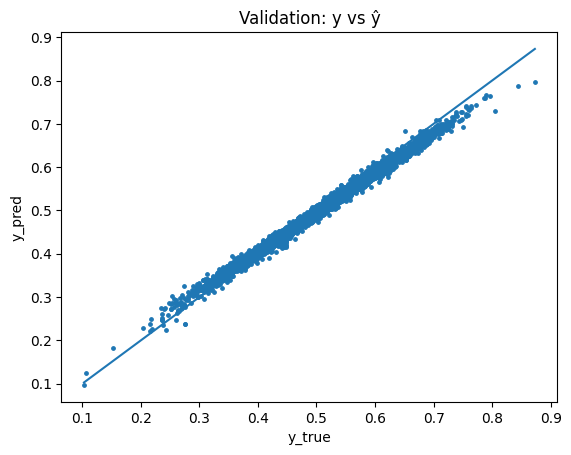

In [100]:
import torch
import matplotlib.pyplot as plt

device = torch.device(results["device"])
model_ckpt = torch.load(results["out_dir"] + "/best.pt", map_location=device)
from train_pytorch_customizable_notebook import build_model,notation

# reconstruit un modèle de même dimensions :
input_size = results["input_size"]; out_features = results["out_features"]
model = build_model(cfg, input_size, out_features).to(device)
model.load_state_dict(model_ckpt["model"]); model.eval()

ys, ps = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device); yb = yb.to(device)
        pred = model(xb).view_as(yb)
        ys.append(yb.cpu()); ps.append(pred.cpu())
y = torch.cat(ys).numpy(); p = torch.cat(ps).numpy()

plt.figure()
plt.scatter(y, p, s=6)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("y_true"); plt.ylabel("y_pred"); plt.title("Validation: y vs ŷ")
plt.show()

In [101]:
import torch

model.eval()
ys, ps = [], []

with torch.no_grad():  # pas de gradient en évaluation
    for xb, yb in test_loader:      # test_loader = ton DataLoader de test
        xb = xb.to(results["device"])   # results["device"] ou device choisi (cpu/cuda)
        yb = yb.to(results["device"])
        
        pred = model(xb)                 # prédiction du modèle
        ps.append(pred.view_as(yb).cpu())  # on remet sur CPU et shape comme yb
        ys.append(yb.cpu())                # on stocke aussi les vraies valeurs

# Concaténer tous les batchs
y_true = torch.cat(ys, dim=0)
y_pred = torch.cat(ps, dim=0)

In [102]:
note = notation(y_true, y_pred)
print(f"Note calibration: {note:.2f}/100")

Note calibration: 80.13/100


In [103]:
def predict_one(model: torch.nn.Module, X, device="cpu"):
    """
    Prédit une valeur y à partir d'un vecteur X avec un modèle PyTorch.

    Args:
        model : le modèle PyTorch entraîné (déjà chargé avec les bons poids).
        X     : features d'entrée (list, numpy.array ou torch.Tensor) shape [F] ou [1,F].
        device: "cpu" ou "cuda" (ou torch.device).

    Returns:
        y_pred : float ou numpy.array de la prédiction.
    """
    if not isinstance(device, torch.device):
        device = torch.device(device)

    # convertir en tenseur
    if isinstance(X, np.ndarray):
        x_tensor = torch.from_numpy(X.astype(np.float32))
    elif isinstance(X, list) or isinstance(X, tuple):
        x_tensor = torch.tensor(X, dtype=torch.float32)
    else:
        x_tensor = X.float()

    # s'assurer du shape [1,F]
    if x_tensor.ndim == 1:
        x_tensor = x_tensor.unsqueeze(0)

    model.eval()
    with torch.no_grad():
        x_tensor = x_tensor.to(device)
        pred = model(x_tensor)
    return pred.cpu().numpy().squeeze()

In [104]:
# Suppose que tu as un vecteur X_rough[0] (numpy) de la bonne dimension
x0 = X_rough[0]   # shape (n_features,)
y_hat = predict_one(model, x0, device=results["device"])
print("Prédiction :", y_hat)

Prédiction : 0.4634035


In [105]:
def predict_Option_new(data,model_Option):   
    return predict_one(model_Option, data, device=results["device"])

In [106]:
ShowBarsFlag = False
PricingInterface(recompute_interface,False,ShowBarsFlag,model).display()

# Rechargement pour reprendre l'entrainement

In [ ]:
def resume_training(out_dir: str | Path, build_model_fn, device="cuda", tag="last"):
    out_dir = Path(out_dir)
    device = torch.device(device)

    with open(out_dir / "config.json", "r", encoding="utf-8") as f:
        cfg = json.load(f)
    with open(out_dir / "meta.json", "r", encoding="utf-8") as f:
        meta = json.load(f)

    input_size   = meta["input_size"]
    out_features = meta["out_features"]

    # reconstruire model / opti / sched
    class C: pass
    c = C()
    for k,v in cfg.items(): setattr(c, k, v)

    model = build_model(c, input_size, out_features).to(device)
    optimizer = make_optimizer(model.parameters(), c)
    scheduler = make_scheduler(optimizer, c)

    ckpt = torch.load(Path(out_dir) / f"{tag}.pt", map_location=device)
    model.load_state_dict(ckpt["model"])
    if ckpt.get("optimizer"): optimizer.load_state_dict(ckpt["optimizer"])
    if ckpt.get("scheduler"): scheduler.load_state_dict(ckpt["scheduler"])

    # TrainState
    st_dict = ckpt.get("state", {})
    st = TrainState(**st_dict) if isinstance(st_dict, dict) else st_dict

    return model, optimizer, scheduler, st, c


In [ ]:
# 1) Recharger ce qu’il faut
from pathlib import Path

out_dir = Path("outputs/run1")

model, optimizer, scheduler, st, cfg_loaded = resume_training(
    out_dir=out_dir,
    build_model_fn=_build_model_from_cfg,   # wrapper qui recrée ton modèle (vu plus haut)
    device="cuda", 
    tag="last"   # on repart du dernier checkpoint
)

print("Repris à l’époque :", st.epoch, " | meilleur score jusqu’ici =", st.best_metric)

# 2) Relancer la boucle d’entraînement
device = torch.device(cfg_loaded["device"] if "device" in cfg_loaded else "cuda")
loss_fn = get_loss_fn(cfg_loaded)
classification = is_classification(cfg_loaded)

max_epochs = 200   # nouveau nombre max total
patience   = cfg_loaded.get("patience", 10)
no_improve = 0

for epoch in range(st.epoch, max_epochs):   # 🔑 on repart de st.epoch
    st.epoch = epoch
    
    # ---------- Train ----------
    train_loss, _ = train_one_epoch(model, train_loader, optimizer, loss_fn, device, scaler=None, args=cfg_loaded)
    # ---------- Val ----------
    val_loss, val_metrics = evaluate(model, val_loader, loss_fn, device, cfg_loaded)

    if scheduler is not None:
        scheduler.step()

    # early stopping metric
    metric_name  = "acc" if classification else "rmse"
    metric_value = val_metrics.get(metric_name, -val_loss if classification else val_loss)
    improved     = (metric_value > st.best_metric) if classification else (metric_value < st.best_metric)

    if improved:
        st.best_metric = metric_value
        save_checkpoint(out_dir, model, optimizer, scheduler, st, tag="best")
        no_improve = 0
    else:
        no_improve += 1
    save_checkpoint(out_dir, model, optimizer, scheduler, st, tag="last")

    print(f"Epoch {epoch+1} | train={train_loss:.4f} | val={val_loss:.4f} | metric={metric_value:.4f}")

    if no_improve >= patience:
        print("Early stopping déclenché")
        break
